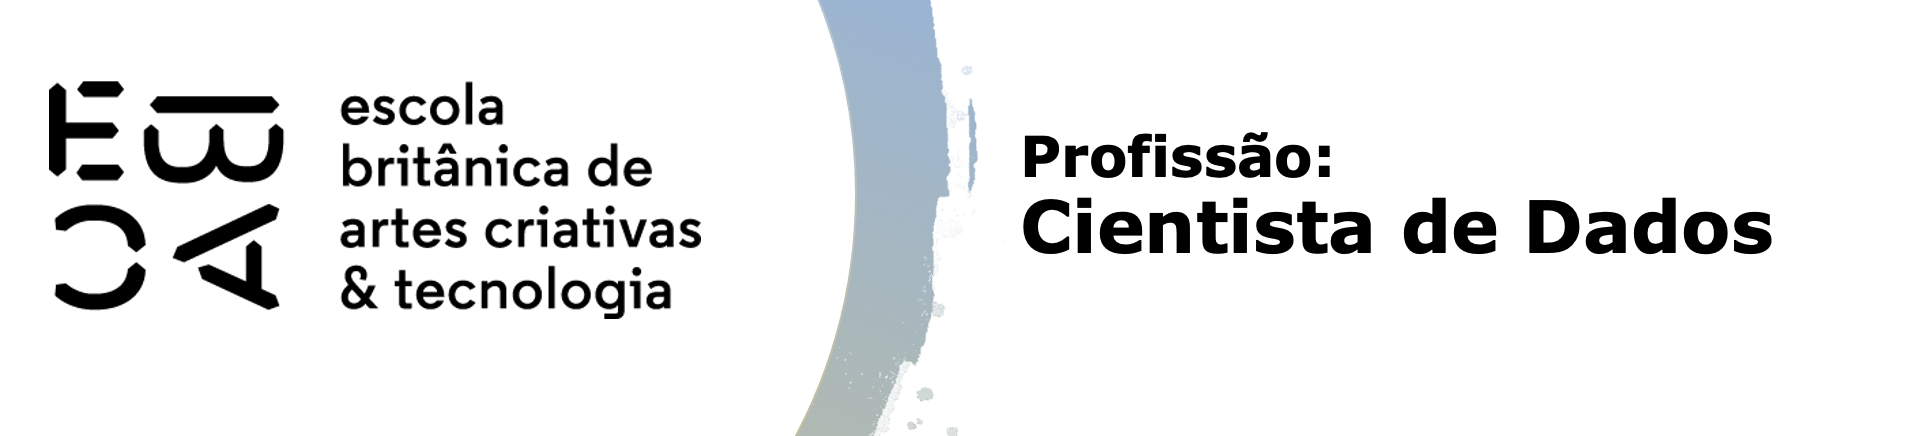

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [2]:

X_train = pd.read_csv("./output/X_train.csv", index_col=['indice', 'indv'])
X_test = pd.read_csv("./output/X_test.csv", index_col=['indice', 'indv'])
y_train = pd.read_csv("./output/y_train.csv", index_col=0)
y_test = pd.read_csv("./output/y_test.csv", index_col=0)


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [3]:
X_train_filtered = X_train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]
X_test_filtered = X_test[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]

In [4]:
# Criar e ajustar o modelo

tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
tree.fit(X_train_filtered, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

In [5]:
clf = DecisionTreeClassifier(random_state=2360873)
caminho = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [6]:
#garantindo que os ccp_alphas são únicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

In [7]:
ccp_alphas

array([0.00000000e+00, 1.35592356e-04, 1.35714283e-04, 1.35842130e-04,
       1.35856252e-04, 1.36017410e-04, 1.81356547e-04, 2.04026115e-04,
       2.17627856e-04, 2.26695684e-04, 2.38030468e-04, 2.44831338e-04,
       2.47531052e-04, 2.52603762e-04, 2.53899166e-04, 2.56921775e-04,
       2.62654309e-04, 2.64033796e-04, 2.64262397e-04, 2.65557801e-04,
       2.65852211e-04, 2.66121020e-04, 2.67575233e-04, 2.67913081e-04,
       2.68358674e-04, 2.68658146e-04, 2.68950463e-04, 2.70117494e-04,
       2.70221260e-04, 2.70465838e-04, 2.72034820e-04, 3.26441785e-04,
       3.26441785e-04, 3.36858308e-04, 3.49759055e-04, 3.62713094e-04,
       3.87649619e-04, 3.88621172e-04, 4.23165276e-04, 4.66192150e-04,
       4.92253485e-04, 4.94903174e-04, 4.98976913e-04, 5.04745441e-04,
       5.10065288e-04, 5.12065544e-04, 5.22689948e-04, 5.34625701e-04,
       5.34628053e-04, 5.37824917e-04, 6.27772663e-04, 6.31196745e-04,
       6.43138204e-04, 6.75086411e-04, 7.20380610e-04, 7.44723995e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [8]:
clf = DecisionTreeClassifier(random_state=2360873)
clf

DecisionTreeClassifier(random_state=2360873)

In [9]:
grid_parametros = {'ccp_alpha':ccp_alphas}
grid_parametros

{'ccp_alpha': array([0.00000000e+00, 1.35592356e-04, 1.35714283e-04, 1.35842130e-04,
        1.35856252e-04, 1.36017410e-04, 1.81356547e-04, 2.04026115e-04,
        2.17627856e-04, 2.26695684e-04, 2.38030468e-04, 2.44831338e-04,
        2.47531052e-04, 2.52603762e-04, 2.53899166e-04, 2.56921775e-04,
        2.62654309e-04, 2.64033796e-04, 2.64262397e-04, 2.65557801e-04,
        2.65852211e-04, 2.66121020e-04, 2.67575233e-04, 2.67913081e-04,
        2.68358674e-04, 2.68658146e-04, 2.68950463e-04, 2.70117494e-04,
        2.70221260e-04, 2.70465838e-04, 2.72034820e-04, 3.26441785e-04,
        3.26441785e-04, 3.36858308e-04, 3.49759055e-04, 3.62713094e-04,
        3.87649619e-04, 3.88621172e-04, 4.23165276e-04, 4.66192150e-04,
        4.92253485e-04, 4.94903174e-04, 4.98976913e-04, 5.04745441e-04,
        5.10065288e-04, 5.12065544e-04, 5.22689948e-04, 5.34625701e-04,
        5.34628053e-04, 5.37824917e-04, 6.27772663e-04, 6.31196745e-04,
        6.43138204e-04, 6.75086411e-04, 7.20380610e

In [10]:
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10, verbose=100)
grid.fit(X_train_filtered, y_train) 

Fitting 10 folds for each of 115 candidates, totalling 1150 fits
[CV 1/10; 1/115] START ccp_alpha=0.0............................................
[CV 1/10; 1/115] END .............ccp_alpha=0.0;, score=0.379 total time=   0.0s
[CV 2/10; 1/115] START ccp_alpha=0.0............................................
[CV 2/10; 1/115] END .............ccp_alpha=0.0;, score=0.378 total time=   0.0s
[CV 3/10; 1/115] START ccp_alpha=0.0............................................
[CV 3/10; 1/115] END .............ccp_alpha=0.0;, score=0.373 total time=   0.0s
[CV 4/10; 1/115] START ccp_alpha=0.0............................................
[CV 4/10; 1/115] END .............ccp_alpha=0.0;, score=0.370 total time=   0.0s
[CV 5/10; 1/115] START ccp_alpha=0.0............................................
[CV 5/10; 1/115] END .............ccp_alpha=0.0;, score=0.370 total time=   0.0s
[CV 6/10; 1/115] START ccp_alpha=0.0............................................
[CV 6/10; 1/115] END .............ccp_alpha=

[CV 2/10; 6/115] END ccp_alpha=0.00013601741022850925;, score=0.382 total time=   0.0s
[CV 3/10; 6/115] START ccp_alpha=0.00013601741022850925.........................
[CV 3/10; 6/115] END ccp_alpha=0.00013601741022850925;, score=0.381 total time=   0.0s
[CV 4/10; 6/115] START ccp_alpha=0.00013601741022850925.........................
[CV 4/10; 6/115] END ccp_alpha=0.00013601741022850925;, score=0.366 total time=   0.0s
[CV 5/10; 6/115] START ccp_alpha=0.00013601741022850925.........................
[CV 5/10; 6/115] END ccp_alpha=0.00013601741022850925;, score=0.370 total time=   0.0s
[CV 6/10; 6/115] START ccp_alpha=0.00013601741022850925.........................
[CV 6/10; 6/115] END ccp_alpha=0.00013601741022850925;, score=0.427 total time=   0.0s
[CV 7/10; 6/115] START ccp_alpha=0.00013601741022850925.........................
[CV 7/10; 6/115] END ccp_alpha=0.00013601741022850925;, score=0.427 total time=   0.0s
[CV 8/10; 6/115] START ccp_alpha=0.00013601741022850925..................

[CV 2/10; 11/115] END ccp_alpha=0.0002380304678998912;, score=0.433 total time=   0.1s
[CV 3/10; 11/115] START ccp_alpha=0.0002380304678998912.........................
[CV 3/10; 11/115] END ccp_alpha=0.0002380304678998912;, score=0.416 total time=   0.1s
[CV 4/10; 11/115] START ccp_alpha=0.0002380304678998912.........................
[CV 4/10; 11/115] END ccp_alpha=0.0002380304678998912;, score=0.363 total time=   0.1s
[CV 5/10; 11/115] START ccp_alpha=0.0002380304678998912.........................
[CV 5/10; 11/115] END ccp_alpha=0.0002380304678998912;, score=0.384 total time=   0.1s
[CV 6/10; 11/115] START ccp_alpha=0.0002380304678998912.........................
[CV 6/10; 11/115] END ccp_alpha=0.0002380304678998912;, score=0.448 total time=   0.1s
[CV 7/10; 11/115] START ccp_alpha=0.0002380304678998912.........................
[CV 7/10; 11/115] END ccp_alpha=0.0002380304678998912;, score=0.464 total time=   0.1s
[CV 8/10; 11/115] START ccp_alpha=0.0002380304678998912..................

[CV 4/10; 16/115] END ccp_alpha=0.0002569217748760731;, score=0.377 total time=   0.1s
[CV 5/10; 16/115] START ccp_alpha=0.0002569217748760731.........................
[CV 5/10; 16/115] END ccp_alpha=0.0002569217748760731;, score=0.399 total time=   0.1s
[CV 6/10; 16/115] START ccp_alpha=0.0002569217748760731.........................
[CV 6/10; 16/115] END ccp_alpha=0.0002569217748760731;, score=0.452 total time=   0.1s
[CV 7/10; 16/115] START ccp_alpha=0.0002569217748760731.........................
[CV 7/10; 16/115] END ccp_alpha=0.0002569217748760731;, score=0.463 total time=   0.1s
[CV 8/10; 16/115] START ccp_alpha=0.0002569217748760731.........................
[CV 8/10; 16/115] END ccp_alpha=0.0002569217748760731;, score=0.433 total time=   0.1s
[CV 9/10; 16/115] START ccp_alpha=0.0002569217748760731.........................
[CV 9/10; 16/115] END ccp_alpha=0.0002569217748760731;, score=0.460 total time=   0.1s
[CV 10/10; 16/115] START ccp_alpha=0.0002569217748760731.................

[CV 6/10; 21/115] END ccp_alpha=0.0002658522109011771;, score=0.454 total time=   0.1s
[CV 7/10; 21/115] START ccp_alpha=0.0002658522109011771.........................
[CV 7/10; 21/115] END ccp_alpha=0.0002658522109011771;, score=0.465 total time=   0.1s
[CV 8/10; 21/115] START ccp_alpha=0.0002658522109011771.........................
[CV 8/10; 21/115] END ccp_alpha=0.0002658522109011771;, score=0.433 total time=   0.1s
[CV 9/10; 21/115] START ccp_alpha=0.0002658522109011771.........................
[CV 9/10; 21/115] END ccp_alpha=0.0002658522109011771;, score=0.464 total time=   0.1s
[CV 10/10; 21/115] START ccp_alpha=0.0002658522109011771........................
[CV 10/10; 21/115] END ccp_alpha=0.0002658522109011771;, score=0.411 total time=   0.1s
[CV 1/10; 22/115] START ccp_alpha=0.0002661210200123005.........................
[CV 1/10; 22/115] END ccp_alpha=0.0002661210200123005;, score=0.389 total time=   0.1s
[CV 2/10; 22/115] START ccp_alpha=0.0002661210200123005.................

[CV 8/10; 26/115] END ccp_alpha=0.0002686581460066651;, score=0.433 total time=   0.1s
[CV 9/10; 26/115] START ccp_alpha=0.0002686581460066651.........................
[CV 9/10; 26/115] END ccp_alpha=0.0002686581460066651;, score=0.464 total time=   0.1s
[CV 10/10; 26/115] START ccp_alpha=0.0002686581460066651........................
[CV 10/10; 26/115] END ccp_alpha=0.0002686581460066651;, score=0.416 total time=   0.1s
[CV 1/10; 27/115] START ccp_alpha=0.00026895046340721343........................
[CV 1/10; 27/115] END ccp_alpha=0.00026895046340721343;, score=0.383 total time=   0.1s
[CV 2/10; 27/115] START ccp_alpha=0.00026895046340721343........................
[CV 2/10; 27/115] END ccp_alpha=0.00026895046340721343;, score=0.447 total time=   0.1s
[CV 3/10; 27/115] START ccp_alpha=0.00026895046340721343........................
[CV 3/10; 27/115] END ccp_alpha=0.00026895046340721343;, score=0.418 total time=   0.1s
[CV 4/10; 27/115] START ccp_alpha=0.00026895046340721343.............

[CV 10/10; 31/115] END ccp_alpha=0.0002720348204570185;, score=0.416 total time=   0.1s
[CV 1/10; 32/115] START ccp_alpha=0.0003264417845484222.........................
[CV 1/10; 32/115] END ccp_alpha=0.0003264417845484222;, score=0.389 total time=   0.1s
[CV 2/10; 32/115] START ccp_alpha=0.0003264417845484222.........................
[CV 2/10; 32/115] END ccp_alpha=0.0003264417845484222;, score=0.446 total time=   0.1s
[CV 3/10; 32/115] START ccp_alpha=0.0003264417845484222.........................
[CV 3/10; 32/115] END ccp_alpha=0.0003264417845484222;, score=0.426 total time=   0.1s
[CV 4/10; 32/115] START ccp_alpha=0.0003264417845484222.........................
[CV 4/10; 32/115] END ccp_alpha=0.0003264417845484222;, score=0.395 total time=   0.1s
[CV 5/10; 32/115] START ccp_alpha=0.0003264417845484222.........................
[CV 5/10; 32/115] END ccp_alpha=0.0003264417845484222;, score=0.376 total time=   0.1s
[CV 6/10; 32/115] START ccp_alpha=0.0003264417845484222.................

[CV 2/10; 37/115] END ccp_alpha=0.0003876496191512514;, score=0.462 total time=   0.1s
[CV 3/10; 37/115] START ccp_alpha=0.0003876496191512514.........................
[CV 3/10; 37/115] END ccp_alpha=0.0003876496191512514;, score=0.431 total time=   0.1s
[CV 4/10; 37/115] START ccp_alpha=0.0003876496191512514.........................
[CV 4/10; 37/115] END ccp_alpha=0.0003876496191512514;, score=0.419 total time=   0.1s
[CV 5/10; 37/115] START ccp_alpha=0.0003876496191512514.........................
[CV 5/10; 37/115] END ccp_alpha=0.0003876496191512514;, score=0.403 total time=   0.1s
[CV 6/10; 37/115] START ccp_alpha=0.0003876496191512514.........................
[CV 6/10; 37/115] END ccp_alpha=0.0003876496191512514;, score=0.454 total time=   0.1s
[CV 7/10; 37/115] START ccp_alpha=0.0003876496191512514.........................
[CV 7/10; 37/115] END ccp_alpha=0.0003876496191512514;, score=0.475 total time=   0.1s
[CV 8/10; 37/115] START ccp_alpha=0.0003876496191512514..................

[CV 4/10; 42/115] END ccp_alpha=0.0004949031744461564;, score=0.422 total time=   0.1s
[CV 5/10; 42/115] START ccp_alpha=0.0004949031744461564.........................
[CV 5/10; 42/115] END ccp_alpha=0.0004949031744461564;, score=0.419 total time=   0.1s
[CV 6/10; 42/115] START ccp_alpha=0.0004949031744461564.........................
[CV 6/10; 42/115] END ccp_alpha=0.0004949031744461564;, score=0.453 total time=   0.1s
[CV 7/10; 42/115] START ccp_alpha=0.0004949031744461564.........................
[CV 7/10; 42/115] END ccp_alpha=0.0004949031744461564;, score=0.456 total time=   0.1s
[CV 8/10; 42/115] START ccp_alpha=0.0004949031744461564.........................
[CV 8/10; 42/115] END ccp_alpha=0.0004949031744461564;, score=0.501 total time=   0.1s
[CV 9/10; 42/115] START ccp_alpha=0.0004949031744461564.........................
[CV 9/10; 42/115] END ccp_alpha=0.0004949031744461564;, score=0.495 total time=   0.1s
[CV 10/10; 42/115] START ccp_alpha=0.0004949031744461564.................

[CV 6/10; 47/115] END ccp_alpha=0.0005226899484101255;, score=0.450 total time=   0.1s
[CV 7/10; 47/115] START ccp_alpha=0.0005226899484101255.........................
[CV 7/10; 47/115] END ccp_alpha=0.0005226899484101255;, score=0.459 total time=   0.1s
[CV 8/10; 47/115] START ccp_alpha=0.0005226899484101255.........................
[CV 8/10; 47/115] END ccp_alpha=0.0005226899484101255;, score=0.498 total time=   0.1s
[CV 9/10; 47/115] START ccp_alpha=0.0005226899484101255.........................
[CV 9/10; 47/115] END ccp_alpha=0.0005226899484101255;, score=0.493 total time=   0.1s
[CV 10/10; 47/115] START ccp_alpha=0.0005226899484101255........................
[CV 10/10; 47/115] END ccp_alpha=0.0005226899484101255;, score=0.479 total time=   0.1s
[CV 1/10; 48/115] START ccp_alpha=0.0005346257005347175.........................
[CV 1/10; 48/115] END ccp_alpha=0.0005346257005347175;, score=0.435 total time=   0.1s
[CV 2/10; 48/115] START ccp_alpha=0.0005346257005347175.................

[CV 8/10; 52/115] END ccp_alpha=0.000631196745394511;, score=0.471 total time=   0.1s
[CV 9/10; 52/115] START ccp_alpha=0.000631196745394511..........................
[CV 9/10; 52/115] END ccp_alpha=0.000631196745394511;, score=0.494 total time=   0.1s
[CV 10/10; 52/115] START ccp_alpha=0.000631196745394511.........................
[CV 10/10; 52/115] END ccp_alpha=0.000631196745394511;, score=0.464 total time=   0.1s
[CV 1/10; 53/115] START ccp_alpha=0.0006431382044440877.........................
[CV 1/10; 53/115] END ccp_alpha=0.0006431382044440877;, score=0.442 total time=   0.1s
[CV 2/10; 53/115] START ccp_alpha=0.0006431382044440877.........................
[CV 2/10; 53/115] END ccp_alpha=0.0006431382044440877;, score=0.467 total time=   0.1s
[CV 3/10; 53/115] START ccp_alpha=0.0006431382044440877.........................
[CV 3/10; 53/115] END ccp_alpha=0.0006431382044440877;, score=0.423 total time=   0.1s
[CV 4/10; 53/115] START ccp_alpha=0.0006431382044440877....................

[CV 10/10; 57/115] END ccp_alpha=0.0007525553434774082;, score=0.457 total time=   0.1s
[CV 1/10; 58/115] START ccp_alpha=0.0007784381016154685.........................
[CV 1/10; 58/115] END ccp_alpha=0.0007784381016154685;, score=0.461 total time=   0.1s
[CV 2/10; 58/115] START ccp_alpha=0.0007784381016154685.........................
[CV 2/10; 58/115] END ccp_alpha=0.0007784381016154685;, score=0.465 total time=   0.1s
[CV 3/10; 58/115] START ccp_alpha=0.0007784381016154685.........................
[CV 3/10; 58/115] END ccp_alpha=0.0007784381016154685;, score=0.453 total time=   0.1s
[CV 4/10; 58/115] START ccp_alpha=0.0007784381016154685.........................
[CV 4/10; 58/115] END ccp_alpha=0.0007784381016154685;, score=0.420 total time=   0.1s
[CV 5/10; 58/115] START ccp_alpha=0.0007784381016154685.........................
[CV 5/10; 58/115] END ccp_alpha=0.0007784381016154685;, score=0.414 total time=   0.1s
[CV 6/10; 58/115] START ccp_alpha=0.0007784381016154685.................

[CV 2/10; 63/115] END ccp_alpha=0.0008660805552807725;, score=0.462 total time=   0.1s
[CV 3/10; 63/115] START ccp_alpha=0.0008660805552807725.........................
[CV 3/10; 63/115] END ccp_alpha=0.0008660805552807725;, score=0.452 total time=   0.1s
[CV 4/10; 63/115] START ccp_alpha=0.0008660805552807725.........................
[CV 4/10; 63/115] END ccp_alpha=0.0008660805552807725;, score=0.423 total time=   0.1s
[CV 5/10; 63/115] START ccp_alpha=0.0008660805552807725.........................
[CV 5/10; 63/115] END ccp_alpha=0.0008660805552807725;, score=0.415 total time=   0.1s
[CV 6/10; 63/115] START ccp_alpha=0.0008660805552807725.........................
[CV 6/10; 63/115] END ccp_alpha=0.0008660805552807725;, score=0.460 total time=   0.1s
[CV 7/10; 63/115] START ccp_alpha=0.0008660805552807725.........................
[CV 7/10; 63/115] END ccp_alpha=0.0008660805552807725;, score=0.463 total time=   0.1s
[CV 8/10; 63/115] START ccp_alpha=0.0008660805552807725..................

[CV 4/10; 68/115] END ccp_alpha=0.0009793253536452664;, score=0.426 total time=   0.1s
[CV 5/10; 68/115] START ccp_alpha=0.0009793253536452664.........................
[CV 5/10; 68/115] END ccp_alpha=0.0009793253536452664;, score=0.416 total time=   0.1s
[CV 6/10; 68/115] START ccp_alpha=0.0009793253536452664.........................
[CV 6/10; 68/115] END ccp_alpha=0.0009793253536452664;, score=0.459 total time=   0.1s
[CV 7/10; 68/115] START ccp_alpha=0.0009793253536452664.........................
[CV 7/10; 68/115] END ccp_alpha=0.0009793253536452664;, score=0.453 total time=   0.1s
[CV 8/10; 68/115] START ccp_alpha=0.0009793253536452664.........................
[CV 8/10; 68/115] END ccp_alpha=0.0009793253536452664;, score=0.456 total time=   0.1s
[CV 9/10; 68/115] START ccp_alpha=0.0009793253536452664.........................
[CV 9/10; 68/115] END ccp_alpha=0.0009793253536452664;, score=0.501 total time=   0.1s
[CV 10/10; 68/115] START ccp_alpha=0.0009793253536452664.................

[CV 6/10; 73/115] END ccp_alpha=0.001088139281828074;, score=0.446 total time=   0.1s
[CV 7/10; 73/115] START ccp_alpha=0.001088139281828074..........................
[CV 7/10; 73/115] END ccp_alpha=0.001088139281828074;, score=0.442 total time=   0.1s
[CV 8/10; 73/115] START ccp_alpha=0.001088139281828074..........................
[CV 8/10; 73/115] END ccp_alpha=0.001088139281828074;, score=0.456 total time=   0.1s
[CV 9/10; 73/115] START ccp_alpha=0.001088139281828074..........................
[CV 9/10; 73/115] END ccp_alpha=0.001088139281828074;, score=0.486 total time=   0.1s
[CV 10/10; 73/115] START ccp_alpha=0.001088139281828074.........................
[CV 10/10; 73/115] END ccp_alpha=0.001088139281828074;, score=0.453 total time=   0.1s
[CV 1/10; 74/115] START ccp_alpha=0.001089621865141225..........................
[CV 1/10; 74/115] END ccp_alpha=0.001089621865141225;, score=0.450 total time=   0.1s
[CV 2/10; 74/115] START ccp_alpha=0.001089621865141225........................

[CV 8/10; 78/115] END ccp_alpha=0.0011446273866224273;, score=0.444 total time=   0.1s
[CV 9/10; 78/115] START ccp_alpha=0.0011446273866224273.........................
[CV 9/10; 78/115] END ccp_alpha=0.0011446273866224273;, score=0.486 total time=   0.1s
[CV 10/10; 78/115] START ccp_alpha=0.0011446273866224273........................
[CV 10/10; 78/115] END ccp_alpha=0.0011446273866224273;, score=0.454 total time=   0.1s
[CV 1/10; 79/115] START ccp_alpha=0.0013057671381936887.........................
[CV 1/10; 79/115] END ccp_alpha=0.0013057671381936887;, score=0.446 total time=   0.1s
[CV 2/10; 79/115] START ccp_alpha=0.0013057671381936887.........................
[CV 2/10; 79/115] END ccp_alpha=0.0013057671381936887;, score=0.461 total time=   0.1s
[CV 3/10; 79/115] START ccp_alpha=0.0013057671381936887.........................
[CV 3/10; 79/115] END ccp_alpha=0.0013057671381936887;, score=0.414 total time=   0.1s
[CV 4/10; 79/115] START ccp_alpha=0.0013057671381936887.................

[CV 10/10; 83/115] END ccp_alpha=0.0013783097569822274;, score=0.441 total time=   0.1s
[CV 1/10; 84/115] START ccp_alpha=0.0016341520286025186.........................
[CV 1/10; 84/115] END ccp_alpha=0.0016341520286025186;, score=0.428 total time=   0.1s
[CV 2/10; 84/115] START ccp_alpha=0.0016341520286025186.........................
[CV 2/10; 84/115] END ccp_alpha=0.0016341520286025186;, score=0.452 total time=   0.1s
[CV 3/10; 84/115] START ccp_alpha=0.0016341520286025186.........................
[CV 3/10; 84/115] END ccp_alpha=0.0016341520286025186;, score=0.410 total time=   0.1s
[CV 4/10; 84/115] START ccp_alpha=0.0016341520286025186.........................
[CV 4/10; 84/115] END ccp_alpha=0.0016341520286025186;, score=0.418 total time=   0.1s
[CV 5/10; 84/115] START ccp_alpha=0.0016341520286025186.........................
[CV 5/10; 84/115] END ccp_alpha=0.0016341520286025186;, score=0.400 total time=   0.1s
[CV 6/10; 84/115] START ccp_alpha=0.0016341520286025186.................

[CV 2/10; 89/115] END ccp_alpha=0.0019357195669763676;, score=0.450 total time=   0.1s
[CV 3/10; 89/115] START ccp_alpha=0.0019357195669763676.........................
[CV 3/10; 89/115] END ccp_alpha=0.0019357195669763676;, score=0.405 total time=   0.1s
[CV 4/10; 89/115] START ccp_alpha=0.0019357195669763676.........................
[CV 4/10; 89/115] END ccp_alpha=0.0019357195669763676;, score=0.407 total time=   0.1s
[CV 5/10; 89/115] START ccp_alpha=0.0019357195669763676.........................
[CV 5/10; 89/115] END ccp_alpha=0.0019357195669763676;, score=0.382 total time=   0.1s
[CV 6/10; 89/115] START ccp_alpha=0.0019357195669763676.........................
[CV 6/10; 89/115] END ccp_alpha=0.0019357195669763676;, score=0.412 total time=   0.1s
[CV 7/10; 89/115] START ccp_alpha=0.0019357195669763676.........................
[CV 7/10; 89/115] END ccp_alpha=0.0019357195669763676;, score=0.404 total time=   0.1s
[CV 8/10; 89/115] START ccp_alpha=0.0019357195669763676..................

[CV 4/10; 94/115] END ccp_alpha=0.0022053612290975073;, score=0.393 total time=   0.1s
[CV 5/10; 94/115] START ccp_alpha=0.0022053612290975073.........................
[CV 5/10; 94/115] END ccp_alpha=0.0022053612290975073;, score=0.384 total time=   0.1s
[CV 6/10; 94/115] START ccp_alpha=0.0022053612290975073.........................
[CV 6/10; 94/115] END ccp_alpha=0.0022053612290975073;, score=0.411 total time=   0.1s
[CV 7/10; 94/115] START ccp_alpha=0.0022053612290975073.........................
[CV 7/10; 94/115] END ccp_alpha=0.0022053612290975073;, score=0.404 total time=   0.1s
[CV 8/10; 94/115] START ccp_alpha=0.0022053612290975073.........................
[CV 8/10; 94/115] END ccp_alpha=0.0022053612290975073;, score=0.419 total time=   0.1s
[CV 9/10; 94/115] START ccp_alpha=0.0022053612290975073.........................
[CV 9/10; 94/115] END ccp_alpha=0.0022053612290975073;, score=0.459 total time=   0.1s
[CV 10/10; 94/115] START ccp_alpha=0.0022053612290975073.................

[CV 6/10; 99/115] END ccp_alpha=0.00254042661001278;, score=0.411 total time=   0.1s
[CV 7/10; 99/115] START ccp_alpha=0.00254042661001278...........................
[CV 7/10; 99/115] END ccp_alpha=0.00254042661001278;, score=0.400 total time=   0.1s
[CV 8/10; 99/115] START ccp_alpha=0.00254042661001278...........................
[CV 8/10; 99/115] END ccp_alpha=0.00254042661001278;, score=0.414 total time=   0.1s
[CV 9/10; 99/115] START ccp_alpha=0.00254042661001278...........................
[CV 9/10; 99/115] END ccp_alpha=0.00254042661001278;, score=0.456 total time=   0.1s
[CV 10/10; 99/115] START ccp_alpha=0.00254042661001278..........................
[CV 10/10; 99/115] END ccp_alpha=0.00254042661001278;, score=0.399 total time=   0.1s
[CV 1/10; 100/115] START ccp_alpha=0.0029072461115360673........................
[CV 1/10; 100/115] END ccp_alpha=0.0029072461115360673;, score=0.413 total time=   0.1s
[CV 2/10; 100/115] START ccp_alpha=0.0029072461115360673........................


[CV 7/10; 104/115] END ccp_alpha=0.005500871815290964;, score=0.337 total time=   0.1s
[CV 8/10; 104/115] START ccp_alpha=0.005500871815290964.........................
[CV 8/10; 104/115] END ccp_alpha=0.005500871815290964;, score=0.382 total time=   0.1s
[CV 9/10; 104/115] START ccp_alpha=0.005500871815290964.........................
[CV 9/10; 104/115] END ccp_alpha=0.005500871815290964;, score=0.405 total time=   0.1s
[CV 10/10; 104/115] START ccp_alpha=0.005500871815290964........................
[CV 10/10; 104/115] END ccp_alpha=0.005500871815290964;, score=0.376 total time=   0.1s
[CV 1/10; 105/115] START ccp_alpha=0.006943039349909331.........................
[CV 1/10; 105/115] END ccp_alpha=0.006943039349909331;, score=0.367 total time=   0.1s
[CV 2/10; 105/115] START ccp_alpha=0.006943039349909331.........................
[CV 2/10; 105/115] END ccp_alpha=0.006943039349909331;, score=0.401 total time=   0.1s
[CV 3/10; 105/115] START ccp_alpha=0.006943039349909331.................

[CV 9/10; 109/115] END ccp_alpha=0.011786934153282457;, score=0.318 total time=   0.1s
[CV 10/10; 109/115] START ccp_alpha=0.011786934153282457........................
[CV 10/10; 109/115] END ccp_alpha=0.011786934153282457;, score=0.310 total time=   0.1s
[CV 1/10; 110/115] START ccp_alpha=0.01885995080296453..........................
[CV 1/10; 110/115] END ccp_alpha=0.01885995080296453;, score=0.295 total time=   0.1s
[CV 2/10; 110/115] START ccp_alpha=0.01885995080296453..........................
[CV 2/10; 110/115] END ccp_alpha=0.01885995080296453;, score=0.299 total time=   0.1s
[CV 3/10; 110/115] START ccp_alpha=0.01885995080296453..........................
[CV 3/10; 110/115] END ccp_alpha=0.01885995080296453;, score=0.303 total time=   0.1s
[CV 4/10; 110/115] START ccp_alpha=0.01885995080296453..........................
[CV 4/10; 110/115] END ccp_alpha=0.01885995080296453;, score=0.283 total time=   0.1s
[CV 5/10; 110/115] START ccp_alpha=0.01885995080296453......................

[CV 1/10; 115/115] END ccp_alpha=0.1861382417305819;, score=0.192 total time=   0.1s
[CV 2/10; 115/115] START ccp_alpha=0.1861382417305819...........................
[CV 2/10; 115/115] END ccp_alpha=0.1861382417305819;, score=0.192 total time=   0.1s
[CV 3/10; 115/115] START ccp_alpha=0.1861382417305819...........................
[CV 3/10; 115/115] END ccp_alpha=0.1861382417305819;, score=0.192 total time=   0.1s
[CV 4/10; 115/115] START ccp_alpha=0.1861382417305819...........................
[CV 4/10; 115/115] END ccp_alpha=0.1861382417305819;, score=0.192 total time=   0.1s
[CV 5/10; 115/115] START ccp_alpha=0.1861382417305819...........................
[CV 5/10; 115/115] END ccp_alpha=0.1861382417305819;, score=0.192 total time=   0.1s
[CV 6/10; 115/115] START ccp_alpha=0.1861382417305819...........................
[CV 6/10; 115/115] END ccp_alpha=0.1861382417305819;, score=0.192 total time=   0.1s
[CV 7/10; 115/115] START ccp_alpha=0.1861382417305819...........................
[CV 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.35592356e-04, 1.35714283e-04, 1.35842130e-04,
       1.35856252e-04, 1.36017410e-04, 1.81356547e-04, 2.04026115e-04,
       2.17627856e-04, 2.26695684e-04, 2.38030468e-04, 2.44831338e-04,
       2.47531052e-04, 2.52603762e-04, 2.53899166e-04, 2.56921775e-04,
       2.626...
       2.07826244e-03, 2.20536123e-03, 2.23027206e-03, 2.37209898e-03,
       2.37966530e-03, 2.46191513e-03, 2.54042661e-03, 2.90724611e-03,
       3.17598400e-03, 3.44050914e-03, 4.87948849e-03, 5.50087182e-03,
       6.94303935e-03, 7.42872230e-03, 9.92305929e-03, 1.07651549e-02,
       1.17869342e-02, 1.88599508e-02, 7.98964351e-02, 9.08568244e-02,
       1.09363718e-01, 1.67257720e-01, 1.86138242e-01])},
             verbose=100)

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [11]:

df_grid = pd.DataFrame(grid.cv_results_)
df_grid.head()

melhor_ccp = df_grid.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=123, ccp_alpha=melhor_ccp).fit(X_train_filtered, y_train)

In [12]:
# Melhor R² do GridSearchCV().

grid.best_score_

0.4564784826974268

In [24]:

melhor_ccp = df_grid.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=123, ccp_alpha=melhor_ccp).fit(X_train_filtered, y_train)

In [25]:
clf.score(X_test_filtered, y_test)

0.44044791313199866

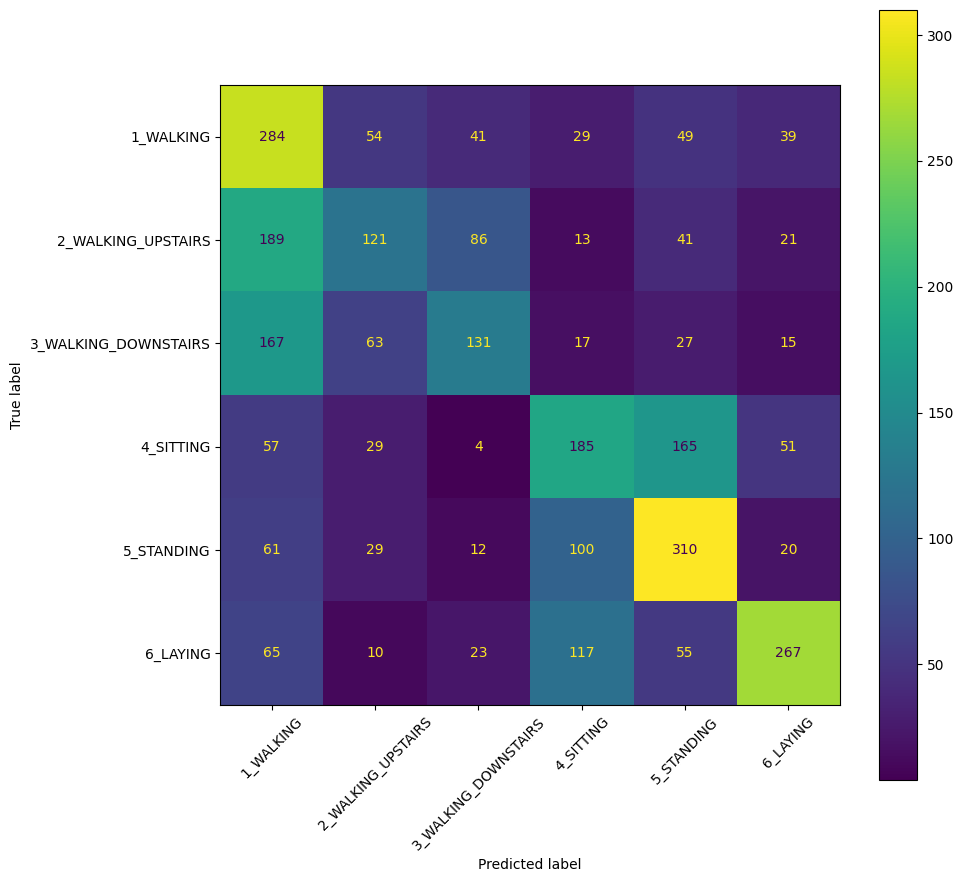

In [26]:

plt.rc('figure', figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(clf, X_test_filtered, y_test)
plt.tick_params(axis='x', rotation=45)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [27]:
# Classe de maior erro

y_pred = clf.predict(X_test_filtered)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(clf.classes_[0],"      :",cm[0,0]/cm.sum(axis=1)[0])
print(clf.classes_[1],"      :",cm[1,1]/cm.sum(axis=1)[1])
print(clf.classes_[2],"      :",cm[2,2]/cm.sum(axis=1)[2])
print(clf.classes_[3],"      :",cm[3,3]/cm.sum(axis=1)[3])
print(clf.classes_[4],"      :",cm[4,4]/cm.sum(axis=1)[4])
print(clf.classes_[5],"      :",cm[5,5]/cm.sum(axis=1)[5])

1_WALKING       : 0.5725806451612904
2_WALKING_UPSTAIRS       : 0.25690021231422505
3_WALKING_DOWNSTAIRS       : 0.3119047619047619
4_SITTING       : 0.37678207739307534
5_STANDING       : 0.5827067669172933
6_LAYING       : 0.4972067039106145


In [20]:
# Selecionando a Classe de maior erro como variável binária.

y_train_maior_erro = pd.get_dummies(y_train, dtype=float).iloc[:,1].to_frame()
y_test_maior_erro = pd.get_dummies(y_test, dtype=float).iloc[:,1].to_frame()

In [28]:
# Arvore para a classe de maior erro
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20, max_depth=4).fit(X_train,y_train_maior_erro)
newvar = (pd.DataFrame(X_train.columns).rename({0:"newcol"},axis=1)
                                          .assign(importances = clf.feature_importances_)
                                          .sort_values(by='importances', ascending=False))[:3]
newvar

,newcol,importances
73,"tGravityAcc-arCoeff()-Z,1",0.336087
330,"fBodyAcc-bandsEnergy()-1,8.2",0.308642
429,fBodyGyro-mad()-X,0.066982


In [30]:
# X_train com as 3 variáveis de maior importância

X_train_new = X_train[newvar['newcol']]

In [31]:
# Teste
X_test_new = X_test[newvar['newcol']]

In [ ]:
Repita o que foi feito, veja que iniciamos o item 2, então conlcua até obter a nova matriz de confusão!